In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [31]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dvinskoy
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | honiara
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | port lincoln
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | tabou
Processing Record 15 of Set 1 | gotsu
Processing Record 16 of Set 1 | chicama
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | kantabanji
Processing Record 19 of Set 1 | meulaboh
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | lichuan
Processing Record 22 of Set 1

Processing Record 34 of Set 4 | craig
Processing Record 35 of Set 4 | lengshuitan
Processing Record 36 of Set 4 | lasa
Processing Record 37 of Set 4 | elko
Processing Record 38 of Set 4 | berlevag
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | san andres
Processing Record 41 of Set 4 | iralaya
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | petatlan
Processing Record 47 of Set 4 | siero
Processing Record 48 of Set 4 | campos belos
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | churapcha
Processing Record 1 of Set 5 | bemidji
Processing Record 2 of Set 5 | husavik
Processing Record 3 of Set 5 | kamaishi
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 6 of Set 5 | cilego

Processing Record 27 of Set 8 | leningradskiy
Processing Record 28 of Set 8 | baoqing
Processing Record 29 of Set 8 | gadwal
Processing Record 30 of Set 8 | menongue
Processing Record 31 of Set 8 | dourbali
Processing Record 32 of Set 8 | mookane
Processing Record 33 of Set 8 | okhotsk
Processing Record 34 of Set 8 | kulhudhuffushi
Processing Record 35 of Set 8 | yanam
Processing Record 36 of Set 8 | savalou
Processing Record 37 of Set 8 | coria
Processing Record 38 of Set 8 | horta
Processing Record 39 of Set 8 | roald
Processing Record 40 of Set 8 | ust-nera
Processing Record 41 of Set 8 | mabaruma
Processing Record 42 of Set 8 | umba
Processing Record 43 of Set 8 | znamenskoye
Processing Record 44 of Set 8 | barahona
Processing Record 45 of Set 8 | acajutla
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | sakakah
Processing Record 48 of Set 8 | karratha
Processing Record 49 of Set 8 | ponta do sol
Processing Record 50 of Set 8 | neryungri
Processing Record 1 

Processing Record 18 of Set 12 | sola
Processing Record 19 of Set 12 | khonuu
City not found. Skipping...
Processing Record 20 of Set 12 | roebourne
Processing Record 21 of Set 12 | victor harbor
Processing Record 22 of Set 12 | kimparana
Processing Record 23 of Set 12 | kosino
Processing Record 24 of Set 12 | namatanai
Processing Record 25 of Set 12 | saint-georges
Processing Record 26 of Set 12 | aksu
Processing Record 27 of Set 12 | kuusankoski
Processing Record 28 of Set 12 | springfield
Processing Record 29 of Set 12 | kyabram
Processing Record 30 of Set 12 | sinop
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | pangody
Processing Record 33 of Set 12 | samana
Processing Record 34 of Set 12 | manuk mangkaw
Processing Record 35 of Set 12 | kiama
Processing Record 36 of Set 12 | nuuk
Processing Record 37 of Set 12 | launceston
Processing Record 38 of Set 12 | ninotsminda
Processing Record 39 of Set 12 | ye
City not found. Skipping...
Processing Record 4

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dvinskoy,62.1535,45.1175,28.20,89,63,3.15,RU,2022-05-05 21:05:48
1,Nikolskoye,59.7035,30.7861,46.71,61,96,7.25,RU,2022-05-05 21:05:49
2,Mataura,-46.1927,168.8643,55.47,85,69,2.66,NZ,2022-05-05 21:05:50
3,Hobart,-42.8794,147.3294,57.25,93,75,6.91,AU,2022-05-05 21:05:06
4,Atuona,-9.8000,-139.0333,78.78,77,100,13.15,PF,2022-05-05 21:05:50
5,Ancud,-41.8697,-73.8203,54.12,91,88,13.47,CL,2022-05-05 21:05:51
6,Honiara,-9.4333,159.9500,80.24,82,51,4.07,SB,2022-05-05 21:05:51
7,Port Lincoln,-34.7333,135.8667,55.27,57,92,9.80,AU,2022-05-05 21:05:52
8,Klaksvik,62.2266,-6.5890,47.32,90,100,16.06,FO,2022-05-05 21:05:53
9,Rikitea,-23.1203,-134.9692,78.04,83,42,16.13,PF,2022-05-05 21:02:26


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dvinskoy,RU,2022-05-05 21:05:48,62.1535,45.1175,28.20,89,63,3.15
1,Nikolskoye,RU,2022-05-05 21:05:49,59.7035,30.7861,46.71,61,96,7.25
2,Mataura,NZ,2022-05-05 21:05:50,-46.1927,168.8643,55.47,85,69,2.66
3,Hobart,AU,2022-05-05 21:05:06,-42.8794,147.3294,57.25,93,75,6.91
4,Atuona,PF,2022-05-05 21:05:50,-9.8000,-139.0333,78.78,77,100,13.15
...,...,...,...,...,...,...,...,...,...
552,Los Llanos De Aridane,ES,2022-05-05 21:10:16,28.6585,-17.9182,64.15,75,75,9.22
553,Abu Samrah,SY,2022-05-05 21:10:16,35.3029,37.1841,56.26,74,37,12.01
554,Jiuquan,CN,2022-05-05 21:10:17,39.7432,98.5174,56.88,29,75,6.22
555,Casablanca,MA,2022-05-05 21:10:17,33.5928,-7.6192,66.33,77,0,11.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

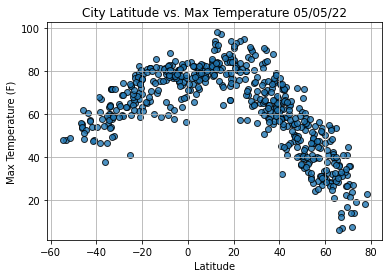

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

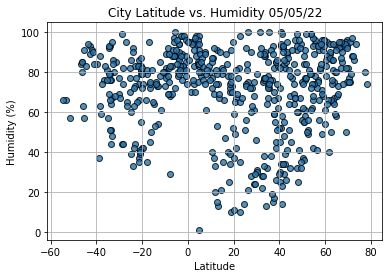

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

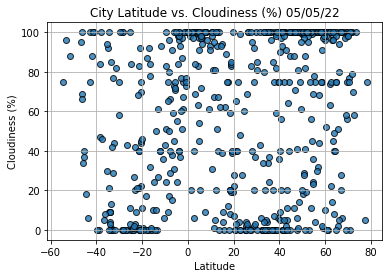

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

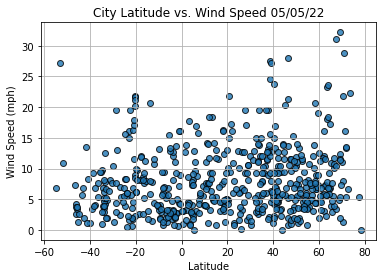

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Chicama
Country                        PE
Date          2022-05-05 21:05:54
Lat                       -7.8447
Lng                      -79.1469
Max Temp                    63.14
Humidity                       68
Cloudiness                     66
Wind Speed                   9.44
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
552     True
553     True
554     True
555     True
556    False
Name: Lat, Length: 557, dtype: bool

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

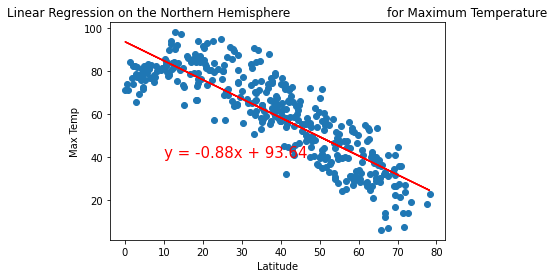

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

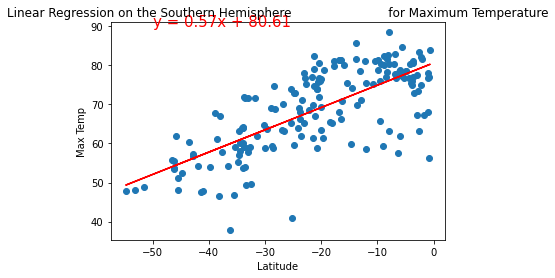

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

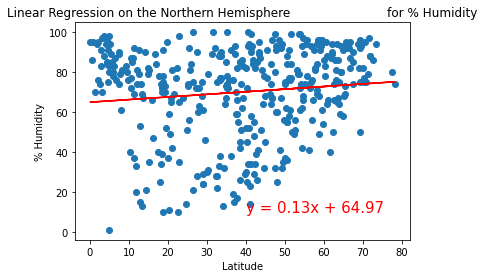

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

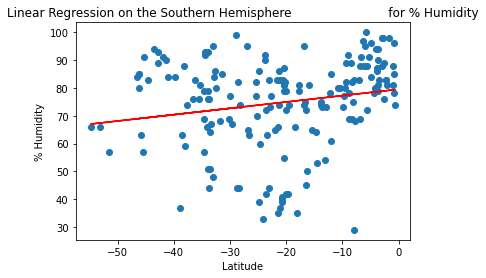

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

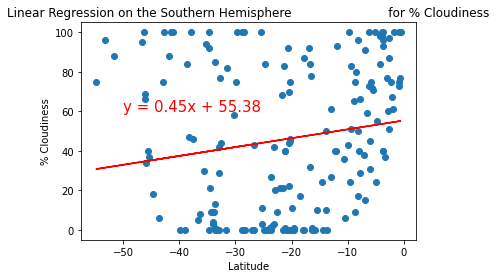

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

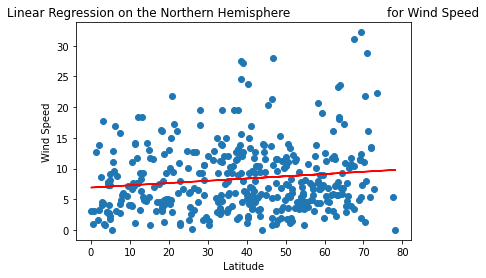

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

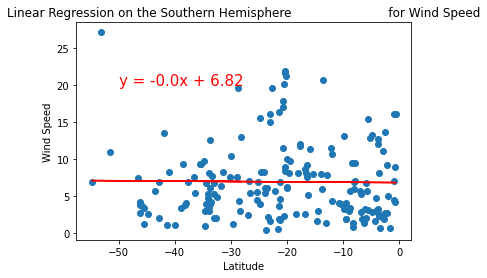

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))